##### 1 – Imports

In [2]:
from sqw.tesselations import even_cycle_two_tesselation
from sqw.experiments import running
from sqw.states import uniform_initial_state, amp2prob
from sqw.statistics import states2mean, states2std, states2ipr, states2survival
from sqw.plots import final_distribution_plot, mean_plot, std_plot, ipr_plot, survival_plot
from sqw.utils import random_tesselation_order, random_angle_deviation, tesselation_choice

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

##### 2 – Dynamics

###### 2.1 – Original

In [31]:
N = 5
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)
final_dist_list = []
samples = 2

for _ in range(0,samples):
    steps = 3
    angles = [[np.pi/3, np.pi/3]] * steps
    tesselation_order = [[0,1] for x in range(steps)]
    initial_state = uniform_initial_state(N, nodes = [N//2+1])
    
    states_ua_ut = running(G, T, steps, 
                     initial_state, 
                     angles = angles, 
                     tesselation_order = tesselation_order)
    
    final_dist = [amp2prob(x) for x in states_ua_ut]
    final_dist_list.append(final_dist)

# print(final_dist_list)
average_distributions = [np.mean(np.array(list(map(lambda x: x[i], final_dist_list))), axis=0) for i in range(len(final_dist_list[0]))]
print(final_dist_list)
print(average_distributions)



[[array([[0.],
       [0.],
       [0.],
       [1.],
       [0.]]), array([[0.    ],
       [0.5625],
       [0.1875],
       [0.0625],
       [0.1875]]), array([[4.21875000e-01],
       [3.16406250e-01],
       [1.17187500e-02],
       [2.50000000e-01],
       [1.92592994e-32]]), array([[6.59179687e-01],
       [3.16406250e-01],
       [4.93038066e-32],
       [6.10351563e-03],
       [1.83105469e-02]])], [array([[0.],
       [0.],
       [0.],
       [1.],
       [0.]]), array([[0.    ],
       [0.5625],
       [0.1875],
       [0.0625],
       [0.1875]]), array([[4.21875000e-01],
       [3.16406250e-01],
       [1.17187500e-02],
       [2.50000000e-01],
       [1.92592994e-32]]), array([[6.59179687e-01],
       [3.16406250e-01],
       [4.93038066e-32],
       [6.10351563e-03],
       [1.83105469e-02]])]]
[array([[0.],
       [0.],
       [0.],
       [1.],
       [0.]]), array([[0.    ],
       [0.5625],
       [0.1875],
       [0.0625],
       [0.1875]]), array([[4.21875000e-01],

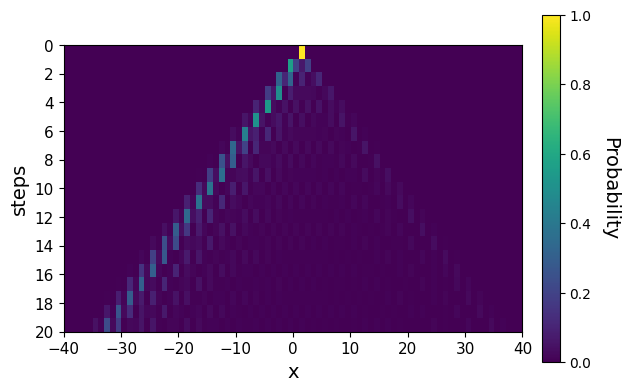

In [28]:
x = np.arange(-N//2, N//2, 1)
y = np.arange(0, steps, 1)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()

im = ax.imshow(average_distributions,interpolation='None',cmap='viridis', extent = [-N//2, N//2, steps, 0])

ratio = 0.5
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
ax.set_xlabel('x',fontsize = 14)
ax.set_ylabel('steps',fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=11)

ax.set_xlim([-40,40])

ax.set_yticks(np.arange(0, steps+1, 2))
ax.set_xticks(np.arange(-40, 41, 10))

cbar = fig.colorbar(im,fraction=0.035, pad=0.04)
cbar.set_label('Probability', rotation=270,labelpad=20,fontsize = 14)


# plt.savefig(f'images/sqw_N{N}_t{steps}_thetapi3-pi3_init0.png',bbox_inches='tight',dpi=300)
plt.show()

In [26]:
states2std(states_ra_ut, range(0, N))

[array([0.]),
 array([1.01588354]),
 array([2.14229941]),
 array([3.06864547]),
 array([3.69981056]),
 array([4.41997251]),
 array([5.1899234]),
 array([6.17615237]),
 array([6.93260036]),
 array([7.67949429]),
 array([8.38087124]),
 array([8.70967194]),
 array([9.39464224]),
 array([9.74673278]),
 array([9.9006329]),
 array([10.2600225]),
 array([10.8578021]),
 array([11.64936745]),
 array([12.09601626]),
 array([12.84208164]),
 array([13.72803116])]

###### 2.2 – Random Angles

In [24]:
N = 121
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)

steps = 20
angles = random_angle_deviation([np.pi/3, np.pi/3], [.4, .4], steps)
tesselation_order = [[0,1] for x in range(steps)]
initial_state = uniform_initial_state(N, nodes = [N//2 + 1])

states_ra_ut = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)
final_dist = [amp2prob(x) for x in states_ra_ut]

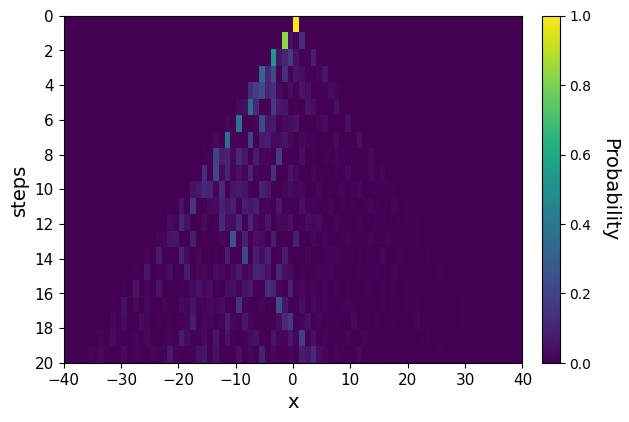

In [25]:
x = np.arange(-N//2, N//2, 1)
y = np.arange(0, steps, 1)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()

im = ax.imshow(final_dist,interpolation='None',cmap='viridis', extent = [-N//2, N//2, steps, 0])

ratio = 0.5
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
ax.set_xlabel('x',fontsize = 14)
ax.set_ylabel('steps',fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=11)

ax.set_xlim([-40,40])

ax.set_yticks(np.arange(0, steps+1, 2))
ax.set_xticks(np.arange(-40, 41, 10))

cbar = fig.colorbar(im,fraction=0.035, pad=0.04)
cbar.set_label('Probability', rotation=270,labelpad=20,fontsize = 14)


# plt.savefig(f'images/sqw_N{N}_t{steps}_thetapi3-pi3_init0.png',bbox_inches='tight',dpi=300)
plt.show()

In [32]:
N = 5
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)
final_dist_list = []
samples = 2

for _ in range(0,samples):
    steps = 3
    angles = random_angle_deviation([np.pi/3, np.pi/3], [.4, .4], steps)
    tesselation_order = [[0,1] for x in range(steps)]
    initial_state = uniform_initial_state(N, nodes = [N//2+1])
    
    states_ua_ut = running(G, T, steps, 
                     initial_state, 
                     angles = angles, 
                     tesselation_order = tesselation_order)
    
    final_dist = [amp2prob(x) for x in states_ua_ut]
    final_dist_list.append(final_dist)

# print(final_dist_list)
average_distributions = [np.mean(np.array(list(map(lambda x: x[i], final_dist_list))), axis=0) for i in range(len(final_dist_list[0]))]
print(final_dist_list)
print(average_distributions)



[[array([[0.],
       [0.],
       [0.],
       [1.],
       [0.]]), array([[0.        ],
       [0.61797145],
       [0.21156494],
       [0.04347503],
       [0.12698857]]), array([[0.25512049],
       [0.49288391],
       [0.1065751 ],
       [0.14418711],
       [0.00123339]]), array([[7.31500134e-01],
       [2.53512501e-01],
       [9.60504859e-05],
       [4.24742194e-05],
       [1.48488403e-02]])], [array([[0.],
       [0.],
       [0.],
       [1.],
       [0.]]), array([[0.        ],
       [0.63359649],
       [0.05865904],
       [0.02607707],
       [0.2816674 ]]), array([[0.50954651],
       [0.14670608],
       [0.04083886],
       [0.29138689],
       [0.01152167]]), array([[0.38804273],
       [0.56638461],
       [0.03381746],
       [0.01036478],
       [0.00139042]])]]
[array([[0.],
       [0.],
       [0.],
       [1.],
       [0.]]), array([[0.        ],
       [0.62578397],
       [0.13511199],
       [0.03477605],
       [0.20432799]]), array([[0.3823335 ],
   

In [34]:
import numpy as np

def calculate_average_distributions(final_dist_list, samples):
    # Check if final_dist_list is empty or contains empty distributions
    if not final_dist_list or not final_dist_list[0]:
        return []
    
    # Initialize an array to hold the average distributions
    average_distributions = [np.zeros_like(dist) for dist in final_dist_list[0]]
    
    # Iterate over each distribution index
    for i in range(len(final_dist_list[0])):
        # Iterate over each sample and accumulate the distributions
        for sample in final_dist_list:
            average_distributions[i] += np.array(sample[i])
        # Divide by the number of samples to get the average
        average_distributions[i] /= samples
    
    return average_distributions

print(average_distributions)
print(calculate_average_distributions(final_dist_list,samples))

[array([[0.],
       [0.],
       [0.],
       [1.],
       [0.]]), array([[0.        ],
       [0.62578397],
       [0.13511199],
       [0.03477605],
       [0.20432799]]), array([[0.3823335 ],
       [0.31979499],
       [0.07370698],
       [0.217787  ],
       [0.00637753]]), array([[0.55977143],
       [0.40994856],
       [0.01695675],
       [0.00520363],
       [0.00811963]])]
[array([[0.],
       [0.],
       [0.],
       [1.],
       [0.]]), array([[0.        ],
       [0.62578397],
       [0.13511199],
       [0.03477605],
       [0.20432799]]), array([[0.3823335 ],
       [0.31979499],
       [0.07370698],
       [0.217787  ],
       [0.00637753]]), array([[0.55977143],
       [0.40994856],
       [0.01695675],
       [0.00520363],
       [0.00811963]])]
